<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Image_Processig/Recycle_009_Image_Processing_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile 
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [2]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [3]:
file_name = zipfile.ZipFile('trash.zip', 'r')
file_name.extractall()

In [4]:
# all images are load in variable x...
FILE='trash.zip'
Img_Size = 28
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [5]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [6]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [7]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [8]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)

In [9]:
# Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [10]:
X = []
Y = []
for II in Ind:
  name = img_name[II]
  X.append(cv2.resize(cv2.imread(name,0),(Img_Size,Img_Size)))
  Y.append(y[II])

In [11]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

X = np.array(X)
Y = np.array(Y)

X = X.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y = Y.astype(np.int32)

# get shapes
# N = len(Y)
K = len(set(Y))

# by default Keras wants one-hot encoded labels
# there's another cost function we can use
# where we can just pass in the integer labels directly
# just like Tensorflow / Theano
Y = ynindicator(Y)


# the model will be a sequence of layers
model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [12]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X, Y, validation_split=0.20, epochs=15, batch_size=32)
print("Returned:", r)


Epoch 1/15
17/17 [==============================] - 20s 105ms/step - loss: 1.7032 - accuracy: 0.3218 - val_loss: 2.0607 - val_accuracy: 0.0370
Epoch 2/15
17/17 [==============================] - 1s 44ms/step - loss: 1.1081 - accuracy: 0.5478 - val_loss: 2.4237 - val_accuracy: 0.0444
Epoch 3/15
17/17 [==============================] - 1s 45ms/step - loss: 0.8181 - accuracy: 0.7144 - val_loss: 2.8798 - val_accuracy: 0.0000e+00
Epoch 4/15
17/17 [==============================] - 1s 45ms/step - loss: 0.6743 - accuracy: 0.7778 - val_loss: 3.2458 - val_accuracy: 0.0000e+00
Epoch 5/15
17/17 [==============================] - 1s 44ms/step - loss: 0.5462 - accuracy: 0.7931 - val_loss: 3.7102 - val_accuracy: 0.0000e+00
Epoch 6/15
17/17 [==============================] - 1s 44ms/step - loss: 0.3626 - accuracy: 0.8950 - val_loss: 4.0310 - val_accuracy: 0.0000e+00
Epoch 7/15
17/17 [==============================] - 1s 43ms/step - loss: 0.2913 - accuracy: 0.9109 - val_loss: 4.1771 - val_accuracy: 0.

In [13]:

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


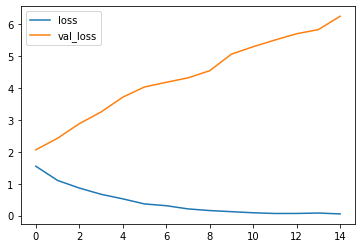

In [14]:

# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()




In [15]:
pd.DataFrame(Y)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
668,0.0,0.0,0.0,0.0,0.0,1.0
669,0.0,0.0,0.0,0.0,0.0,1.0
670,0.0,0.0,0.0,0.0,0.0,1.0
671,0.0,0.0,0.0,0.0,0.0,1.0


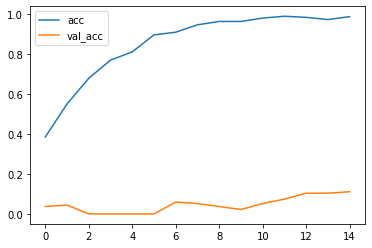

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()